In [1]:
import yaggie
import matplotlib.pyplot as plt

# Load image from lif file

we use Leika confoco microsopy a lot, and a `.lif` file is what the machine gives me in the end. Loading images from this file into python, typicall as a numpy array, is not easy.

Thankfully, Mathieu Leocmach wrote a good lif reader in his [colloids](https://github.com/MathieuLeocmach/colloids) package. I modified it and make it work with python3. This notebooks describes how to do the lif reading.

In [2]:
lif_file_path = '../zebrabow.lif'
reader = yaggie.read_lif.Reader(lif_file_path)

# See what's inside the lif file

Images were organised as "series" inside a lif file, we can iter through the series with following command

In [3]:
series = reader.getSeries()
for s in series:
    print(s.getName())

Zebrabow cs2 fish 1
Image002
Image003
Zebrabow cs2 fish 1 higher format
Zebrabow cs2 fish 2 512x512
Zebrabow cs2 fish 2 higher format
Sox10GFPCol2mCh
Sox10GFPmCh higher format
Col2almCh
Col2almCh higher format


# Get acutrall data

Suppose we want to analyse the 3rd channel of image `Zebrabow cs2 fish 2 higher format`, we could use `getFrame()` to get the data. The returned data is a `numpy.ndarray` instance.

In [4]:
for s in series:
    if s.getName() == 'Zebrabow cs2 fish 2 higher format':
        data = s.getFrame(channel=2, T=0)
print(data.shape)

(1024, 1024, 82)


As the result, we get a 3D `numpy` array, and it looks like:

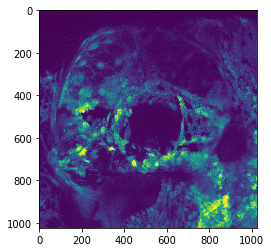

In [5]:
plt.imshow(data.max(-1))
plt.show()